# Modelo de identificação de fraudes
- Esse é um primeiro modelo para identificar compras fraudulentas no cartão de crédito
- Para esse caso vou definir que o negócio pede:
    - Em compras até um valor específico o modelo deve identificar o máximo de fraudes corretamente, equilibrando com um valor menor de não fraudes classficadas como fraude
    - Em compras mais altas a partir de um valor específico muito alto, o modelo deve identificar o máximo de fraudes corretamene, mesmo que isso implique que o número de casos que não são fraudes identificados como fraude seja maior

In [186]:
#Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#Tirand os warnings
import warnings
warnings.filterwarnings('ignore')

In [187]:
#Importando base
base = pd.read_csv(r"C:\Users\cacam\Ciência de Dados\Identificação de fraude 2\creditcard.csv")

In [188]:
#Visualizando base
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [189]:
#Informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Não existe nenhum valor nulo

In [190]:
base.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- As colunas Time e Amount possuem um valor máximo muito alto, e fazendo os testes isso pode ser prejudicial para o modelo final. 
- Vou colocar os valores entre 0 e 1

In [191]:
#Ajustando as colunas Time e Amount
base.Time = base.Time / base.Time.max()
base.Amount = base.Amount / base.Amount.max()

#### Verificando a quantidade de transações que são fraude e que não são fraude na base

In [192]:
#Quantidade de transações fraude e não fraude
base.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

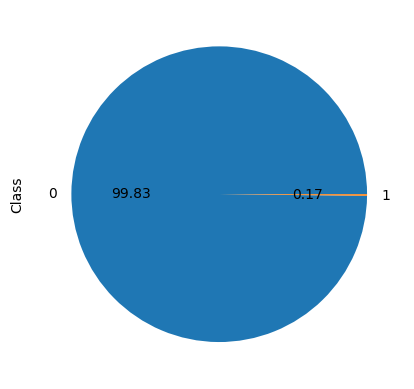

In [193]:
#Visuzalindo o percentual
base.Class.value_counts().plot.pie(autopct='%.2f');

A base está desbalanceada, a maioria dos registros são transações não fraudulendas. Vou utilizar o undersampling para equilibrar a base

In [194]:
#Definindo o X e y da base
X = base.drop('Class', axis=1)
y = base.Class

In [195]:
#Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

- Aqui utilizei o RandomUnderSampler, o ClusterCentroids e o NearMiss para balancear a base e testar os modelos de Árvore de Decisão, Regressão Logística, KNN, SVM e RandomForest para ver quais modelos se encaixariam melhor para cada situação e melhorá-los (Eliminei os modelos SVM e RandomForest pois nos testes eles não saíram como bons modelos para o projeto)
- Utilizei a matriz de confusão, a precisão e recall para metrificar

- Para o caso de valores até 50 mil: Queria um recall alto, mas que não tenha uma precisão muito baixa. O modelo deve classificar corretamente o maior número de transações que são de fato fraude, mas sem classificar uma taxa muito alta de fraudes onde as transações não são fraudes
- Para o caso de valores maiores que 50 mil: Recall mais alto possível, mesmo que com uma precisão baixa. O modelo deve classificar o máximo de casos possíveis que são fraude como fraude, mesmo que isso implique em um número maior de transações que não são fraude sendo classificadas como fraude

### Utilizando o RandomUnderSampler

In [196]:
rus = RandomUnderSampler(random_state=42)
X_res_ru, y_res_ru = rus.fit_resample(X_train, y_train)

In [197]:
#Contando quantos valores existem em cada classe
y_res_u.value_counts()

0    330
1    330
Name: Class, dtype: int64

#### Regressão Logística

In [198]:
clf_rl_ru = LogisticRegression(random_state=0).fit(X_res_ru, y_res_ru)
y_pred_rl_ru = clf_rl_ru.predict(X_test)
confusion_matrix(y_test, y_pred_rl_ru)

array([[89875,  3950],
       [   15,   147]], dtype=int64)

In [199]:
precision_score(y_test, y_pred_rl_ru)*100

3.587991213082743

In [200]:
recall_score(y_test, y_pred_rl_ru)*100

90.74074074074075

- Temos um modelo classificando:
    - 15 transações fraudulentas como não fraudulentas
    - 147 transações fraudulentas como fraudulentas
    - 3950 transações não fraudulentas como fraudulentas
- É um modelo que pode corresponder ao caso 1

#### KNN

In [201]:
clf_knn_ru = KNeighborsClassifier(n_neighbors=3).fit(X_res_ru, y_res_ru)

y_pred_knn_ru = clf_knn_ru.predict(X_test)

confusion_matrix(y_test, y_pred_knn_ru)

array([[91136,  2689],
       [   15,   147]], dtype=int64)

In [202]:
precision_score(y_test, y_pred_knn_ru)*100

5.1833568406205925

In [203]:
recall_score(y_test, y_pred_knn_ru)*100

90.74074074074075

- Temos um modelo classificando:
    - 15 transações fraudulentas como não fraudulentas
    - 147 transações fraudulentas como fraudulentas
    - 2689 transações não fraudulentas como fraudulentas
- É um modelo que pode corresponder ao caso 1

### Utilizando ClusterCentroids

In [204]:
cc = ClusterCentroids(random_state=42)
X_res_cc, y_res_cc = cc.fit_resample(X_train, y_train)

#### Árvore de Decisão

In [205]:
clf_ad_cc = tree.DecisionTreeClassifier(random_state=42)
clf_ad_cc = clf_ad_cc.fit(X_res_cc, y_res_cc)

y_pred_ad_cc = clf_ad_cc.predict(X_test)

confusion_matrix(y_test, y_pred_ad_cc)

array([[47171, 46654],
       [   11,   151]], dtype=int64)

In [206]:
precision_score(y_test, y_pred_ad_cc)*100

0.3226151052238009

In [207]:
recall_score(y_test, y_pred_ad_cc)*100

93.20987654320987

- Temos um modelo classificando:
    - 11 transações fraudulentas como não fraudulentas
    - 151 transações fraudulentas como fraudulentas
    - 46654 transações não fraudulentas como fraudulentas
- É um modelo que classifica um pouco melhor as fraudes do que os acima, mas com o custo das transações não fraudes classificadas como fraudes muito mais alto. Pode vir a fazer sentido para o caso 2.

### Utilizando NearMiss

In [208]:
nm = NearMiss()
X_res_nm, y_res_nm = nm.fit_resample(X_train, y_train)

#### Árvore de Decisão

In [209]:
clf_ad_nm = tree.DecisionTreeClassifier(random_state=42)
clf_ad_nm = clf_ad_nm.fit(X_res_nm, y_res_nm)

y_pred_ad_nm = clf_ad_nm.predict(X_test)

confusion_matrix(y_test, y_pred_ad_nm)

array([[ 4948, 88877],
       [    5,   157]], dtype=int64)

In [210]:
recall_score(y_test, y_pred_ad_nm)*100

96.91358024691358

In [211]:
precision_score(y_test, y_pred_ad_nm)*100

0.17633712963586945

- Temos um modelo classificando:
    - 5 transações fraudulentas como não fraudulentas
    - 157 transações fraudulentas como fraudulentas
    - 88877 transações não fraudulentas como fraudulentas
- É um modelo que classifica um bem melhor as fraudes corretamente, com o custo das transações não fraudes classificadas como fraudes muito mais alto. Também é um modelo que faz sentido para o caso 2

#### KNN

In [212]:
clf_knn_nm = KNeighborsClassifier(n_neighbors=3).fit(X_res_nm, y_res_nm)

y_pred_knn_nm = clf_knn_nm.predict(X_test)

confusion_matrix(y_test, y_pred_knn_nm)

array([[71778, 22047],
       [   12,   150]], dtype=int64)

In [213]:
recall_score(y_test, y_pred_knn_nm)*100

92.5925925925926

In [214]:
precision_score(y_test, y_pred_knn_nm)*100

0.6757669955399379

- Temos um modelo classificando:
    - 5 transações fraudulentas como não fraudulentas
    - 157 transações fraudulentas como fraudulentas
    - 88877 transações não fraudulentas como fraudulentas
- É um modelo que classifica um bem melhor as fraudes corretamente, com o custo das transações não fraudes classificadas como fraudes muito mais alto. Também é um modelo que faz sentido para o caso 2

#### Os casos acima são os que encontrei que faziam mais sentido para o negócio
#### Tendo em mente os casos pedidos pelo negócio, temos que:
- Para o caso 1: modelo KNN com a base balanceada utilizando o RandomUnderSampler, pois é o que traz o maior número de fraudes identificadas e menor número de casos de fraudes não classificadas mantendo o equilíbrio das transações classificadas como fraudes quando não eram.
- Para o caso 2: modelo de árvore de decisão com a base balanceada utilzando o NearMiss. É o que traz o menor número possível de transações fraudulentas classificadas como não fraudulentas, mas sempre lembrar que também traz um número alto de transações não fraudulentas classificadas como fraudulentas. Acredito que as transações os clientes desse negócio de valores muito altos já esperam receber algo confirmando a compra e também não seriam tantas compras assim que rodariam com esse modelo.